# **Ucitavanje podataka**

In [ ]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/card_transdata.csv')
X = df.drop(['fraud'], axis=1)
y = df['fraud']

# **Histogrami**

# **grupisanje skupa na dva podskupa u zavisnosti da li je prevara ili ne**

In [ ]:
prevare=(y==1)
x_prevara=X[prevare]
x_prevara=pd.DataFrame(x_prevara)
x_nije_prevara=X[~prevare]
x_nije_prevara=pd.DataFrame(x_nije_prevara)

# **4-7   (used_chip-fraud)**

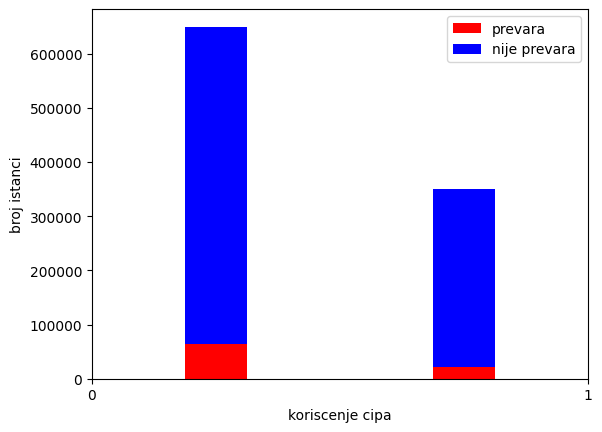

In [ ]:
plt.hist([x_prevara.iloc[:,4],x_nije_prevara.iloc[:,4]],bins=2,color=['red','blue'],histtype='barstacked',
         rwidth=0.25,label=['prevara','nije prevara'])
plt.xlabel('koriscenje cipa')
plt.ylabel('broj istanci')
plt.legend(loc='upper right')
plt.xticks([0,1], ['0','1'])
plt.show()


# **5-7  (used_pin_number-fraud)**

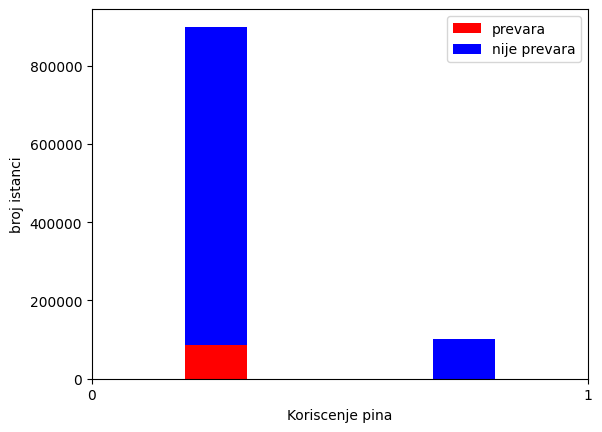

In [ ]:
plt.hist([x_prevara.iloc[:,5],x_nije_prevara.iloc[:,5]],bins=2,color=['red','blue'],histtype='barstacked',
         rwidth=0.25,label=['prevara','nije prevara'])
plt.xlabel('Koriscenje pina')
plt.ylabel('broj istanci')
plt.legend(loc='upper right')
plt.xticks([0,1], ['0','1'])
plt.show()

In [ ]:
#print(sum((y==1) & (X.iloc[:,5]==1))) #provera kada je koriscenje pita=1 i kada je u pitanju fraud

273


# **6-7  (online_order-fraud)**

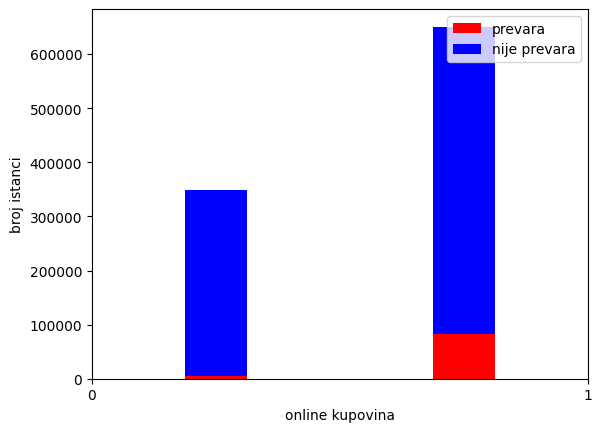

In [ ]:
plt.hist([x_prevara.iloc[:,6],x_nije_prevara.iloc[:,6]],bins=2,color=['red','blue'],histtype='barstacked',
         rwidth=0.25,label=['prevara','nije prevara'])
plt.xlabel('online kupovina')
plt.ylabel('broj istanci')
plt.legend(loc='upper right')
plt.xticks([0,1], ['0','1'])
plt.show()

# **Preprocesiranje**

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

fraud_indexes = (y == 1)  # indeksi instanci koje imaju fraud = 1
fraud_x = X[fraud_indexes, :]  # skup X samo za instance sa fraud = 1
non_fraud_x = X[~fraud_indexes, :]  # skup X samo za instance sa fraud = 0

# **0-6  (distance_from_home-online_order)**

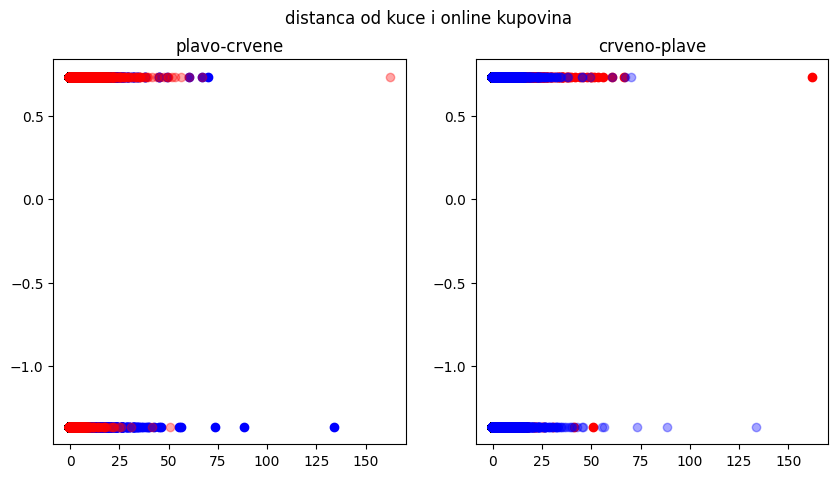

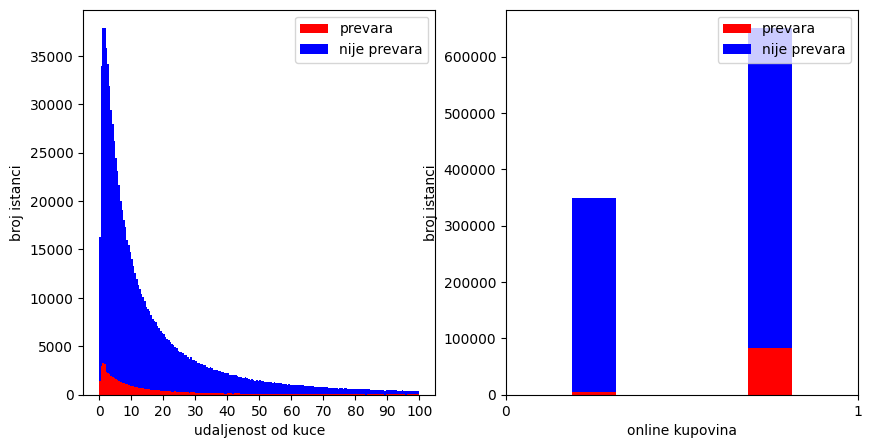

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 0], non_fraud_x[:, 6], c='blue')
axes[0].scatter(fraud_x[:, 0], fraud_x[:, 6], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 0], fraud_x[:, 6], c='red')
axes[1].scatter(non_fraud_x[:, 0], non_fraud_x[:, 6], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('distanca od kuce i online kupovina')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za distancu od kuce
ax1.hist([x_prevara.iloc[:,0], x_nije_prevara.iloc[:,0]], bins=200, range=(0, 100), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('udaljenost od kuce')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 100, 11))

# histogram za online kupovinu
ax2.hist([x_prevara.iloc[:,6],x_nije_prevara.iloc[:,6]], bins=2, color=['red','blue'], histtype='barstacked', rwidth=0.25, label=['prevara','nije prevara'])
ax2.set_xlabel('online kupovina')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks([0,1])
ax2.set_xticklabels(['0','1'])

plt.show()

# **1-6  (distance_from_last_transaction-online_order)**

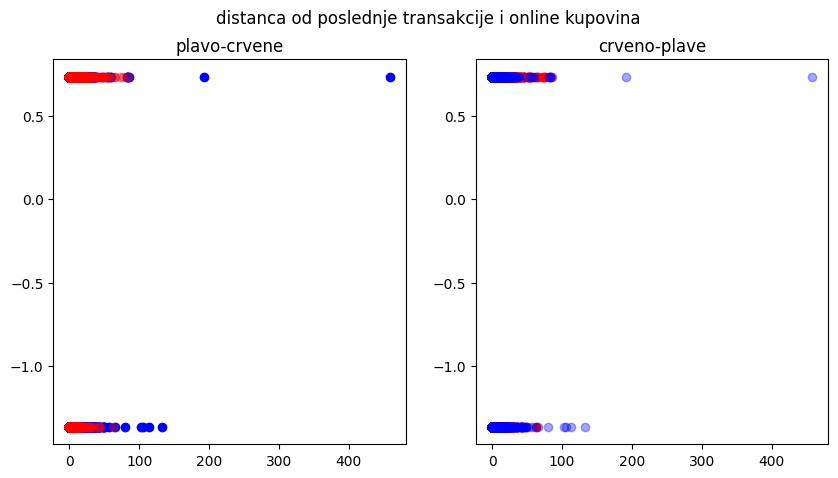

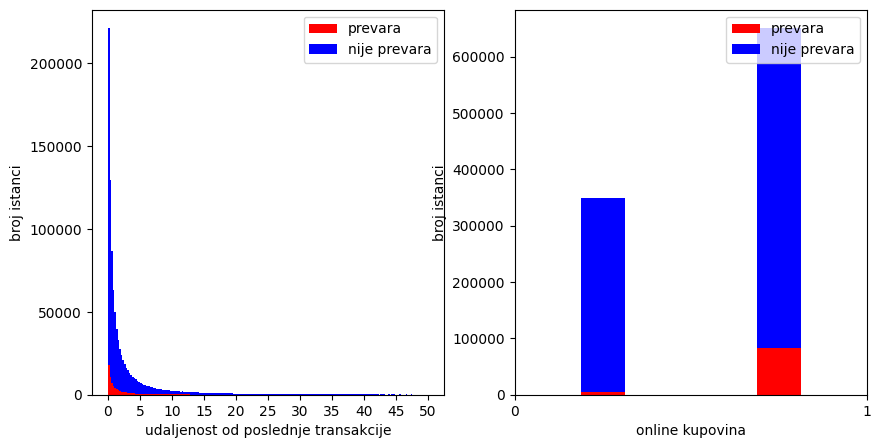

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 1], non_fraud_x[:, 6], c='blue')
axes[0].scatter(fraud_x[:, 1], fraud_x[:, 6], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 1], fraud_x[:, 6], c='red')
axes[1].scatter(non_fraud_x[:, 1], non_fraud_x[:, 6], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('distanca od poslednje transakcije i online kupovina')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za distancu od poslednje transakcije
ax1.hist([x_prevara.iloc[:,1], x_nije_prevara.iloc[:,1]], bins=200, range=(0, 50), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('udaljenost od poslednje transakcije')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 50, 11))

# histogram za online kupovinu
ax2.hist([x_prevara.iloc[:,6],x_nije_prevara.iloc[:,6]], bins=2, color=['red','blue'], histtype='barstacked', rwidth=0.25, label=['prevara','nije prevara'])
ax2.set_xlabel('online kupovina')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks([0,1])
ax2.set_xticklabels(['0','1'])

plt.show()

# **2-6   (ratio_to_median_purchase_price-online_order)**

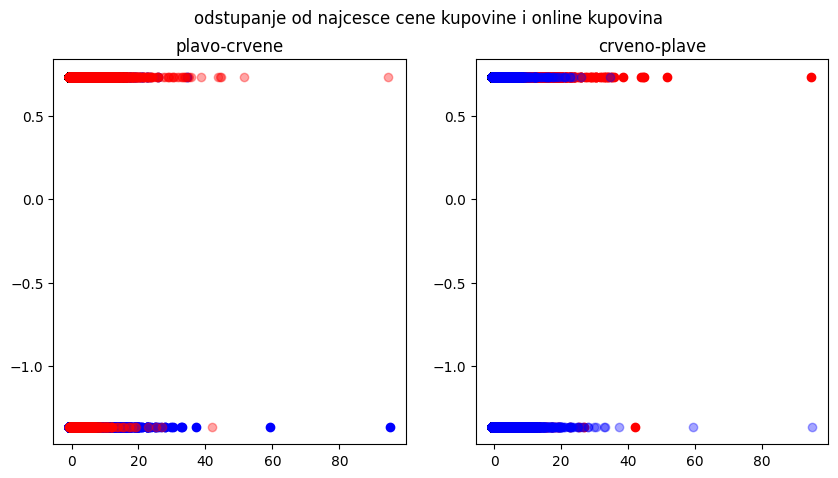

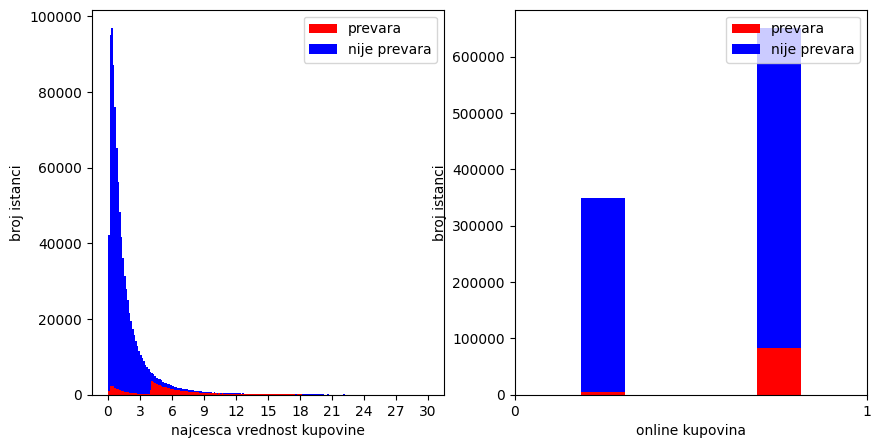

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 2], non_fraud_x[:, 6], c='blue')
axes[0].scatter(fraud_x[:, 2], fraud_x[:, 6], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 2], fraud_x[:, 6], c='red')
axes[1].scatter(non_fraud_x[:, 2], non_fraud_x[:, 6], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('odstupanje od najcesce cene kupovine i online kupovina')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za odstupanje od najcesce vrednosti kupovine
ax1.hist([x_prevara.iloc[:,2], x_nije_prevara.iloc[:,2]], bins=200, range=(0, 30), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('najcesca vrednost kupovine')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 30, 11))

# histogram za online kupovinu
ax2.hist([x_prevara.iloc[:,6],x_nije_prevara.iloc[:,6]], bins=2, color=['red','blue'], histtype='barstacked', rwidth=0.25, label=['prevara','nije prevara'])
ax2.set_xlabel('online kupovina')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks([0,1])
ax2.set_xticklabels(['0','1'])

plt.show()

# **0-2  (distance_from_home-ratio_to_median_purchase_price)**

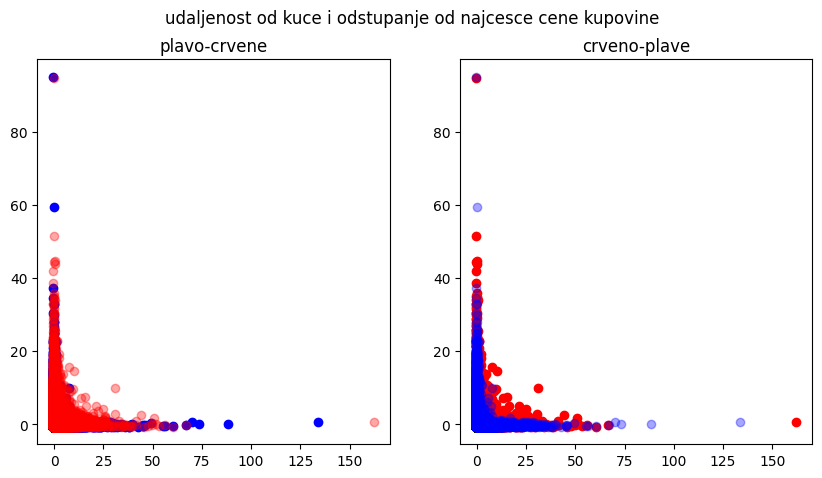

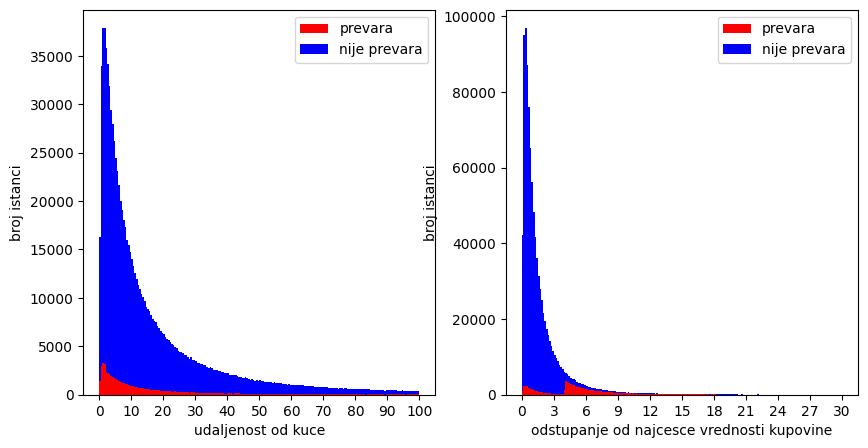

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 0], non_fraud_x[:, 2], c='blue')
axes[0].scatter(fraud_x[:, 0], fraud_x[:, 2], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 0], fraud_x[:, 2], c='red')
axes[1].scatter(non_fraud_x[:, 0], non_fraud_x[:, 2], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('udaljenost od kuce i odstupanje od najcesce cene kupovine')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za distancu od kuce
ax1.hist([x_prevara.iloc[:,0], x_nije_prevara.iloc[:,0]], bins=200, range=(0, 100), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('udaljenost od kuce')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 100, 11))

# histogram za odstupanje od najcesce vrednosti kupovine
ax2.hist([x_prevara.iloc[:,2], x_nije_prevara.iloc[:,2]], bins=200, range=(0, 30), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax2.set_xlabel('odstupanje od najcesce vrednosti kupovine')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks(np.linspace(0, 30, 11))


plt.show()

# **0-3   (distance_from_home-repeat_retailer)**

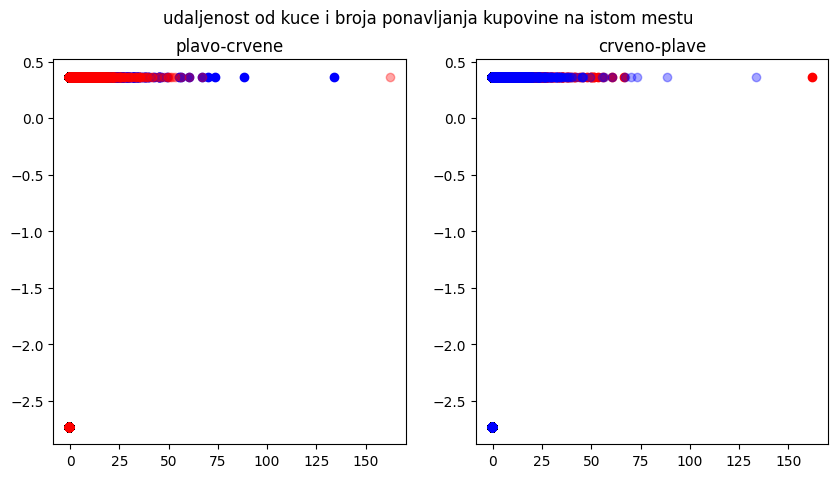

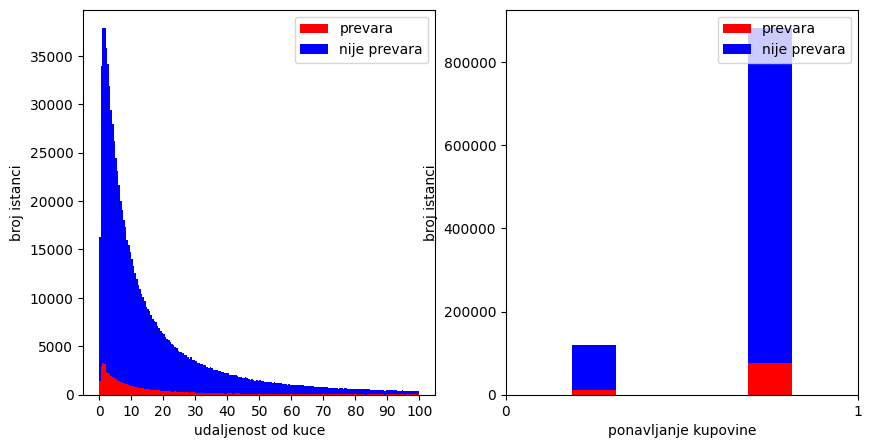

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 0], non_fraud_x[:, 3], c='blue')
axes[0].scatter(fraud_x[:, 0], fraud_x[:, 3], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 0], fraud_x[:, 3], c='red')
axes[1].scatter(non_fraud_x[:, 0], non_fraud_x[:, 3], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('udaljenost od kuce i broja ponavljanja kupovine na istom mestu')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za distancu od kuce
ax1.hist([x_prevara.iloc[:,0], x_nije_prevara.iloc[:,0]], bins=200, range=(0, 100), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('udaljenost od kuce')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 100, 11))

# histogram za ponavljanje iste kupovine
ax2.hist([x_prevara.iloc[:,3],x_nije_prevara.iloc[:,3]], bins=2, color=['red','blue'], histtype='barstacked', rwidth=0.25, label=['prevara','nije prevara'])
ax2.set_xlabel('ponavljanje kupovine')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks([0,1])
ax2.set_xticklabels(['0','1'])

plt.show()

# **1-2   (distance_from_last_transaction-ratio_to_median_purchase_price)**

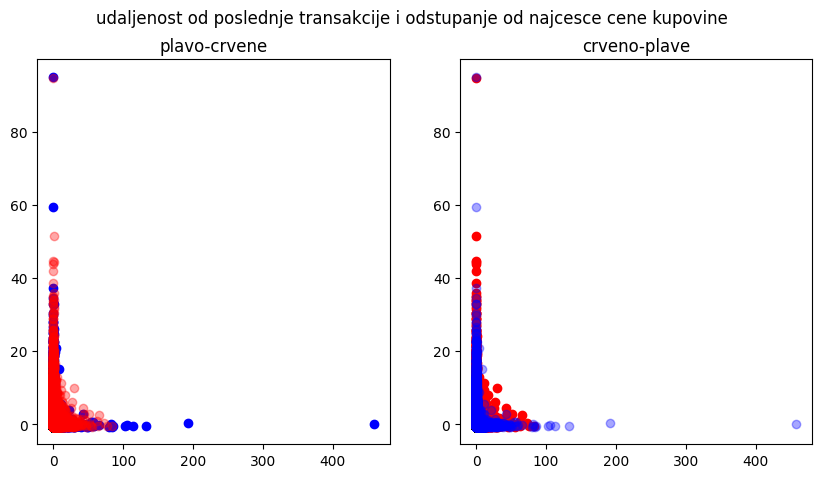

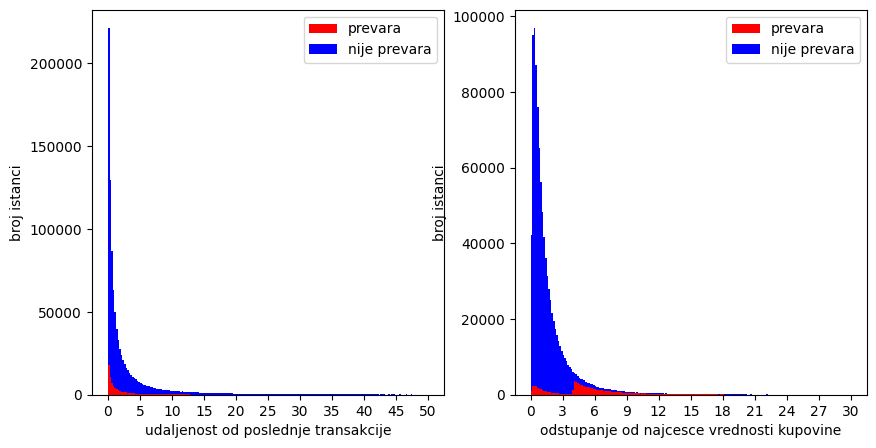

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 1], non_fraud_x[:, 2], c='blue')
axes[0].scatter(fraud_x[:, 1], fraud_x[:, 2], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 1], fraud_x[:, 2], c='red')
axes[1].scatter(non_fraud_x[:, 1], non_fraud_x[:, 2], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('udaljenost od poslednje transakcije i odstupanje od najcesce cene kupovine')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za distancu od poslednje transakcije
ax1.hist([x_prevara.iloc[:,1], x_nije_prevara.iloc[:,1]], bins=200, range=(0, 50), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('udaljenost od poslednje transakcije')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 50, 11))

# histogram za odstupanje od najcesce vrednosti kupovine
ax2.hist([x_prevara.iloc[:,2], x_nije_prevara.iloc[:,2]], bins=200, range=(0, 30), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax2.set_xlabel('odstupanje od najcesce vrednosti kupovine')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks(np.linspace(0, 30, 11))


plt.show()

# **1-3   (distance_from_last_transaction-repeat_retailer)**


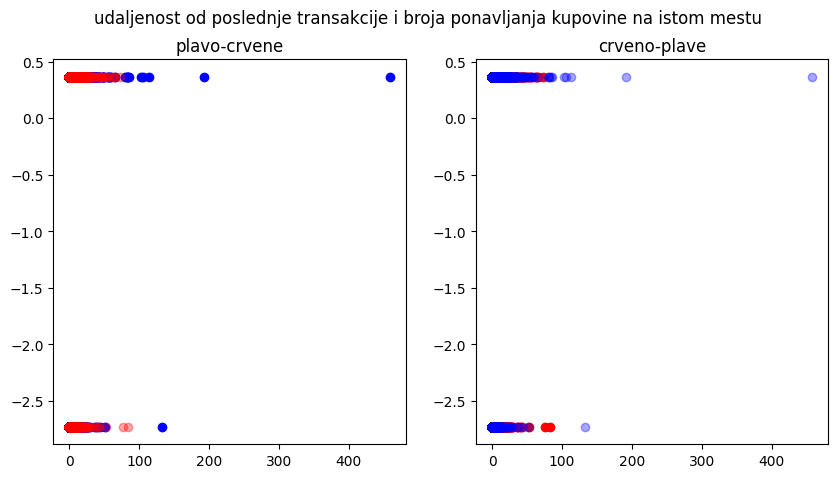

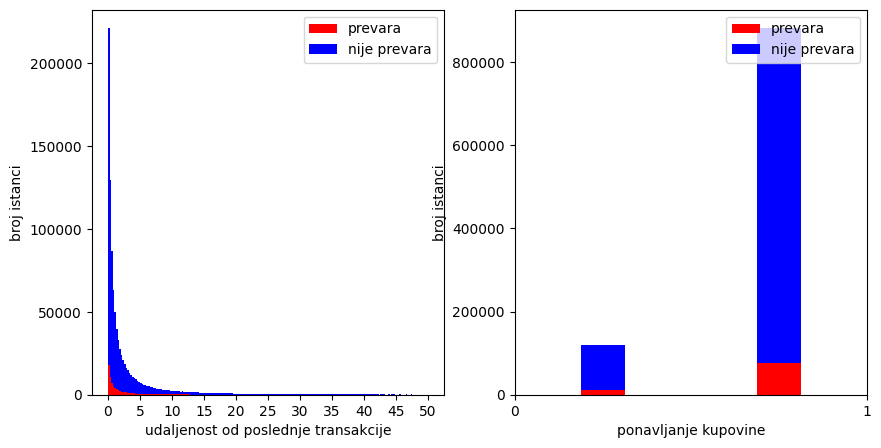

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 1], non_fraud_x[:, 3], c='blue')
axes[0].scatter(fraud_x[:, 1], fraud_x[:, 3], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 1], fraud_x[:, 3], c='red')
axes[1].scatter(non_fraud_x[:, 1], non_fraud_x[:, 3], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('udaljenost od poslednje transakcije i broja ponavljanja kupovine na istom mestu')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za distancu od poslednje transakcije
ax1.hist([x_prevara.iloc[:,1], x_nije_prevara.iloc[:,1]], bins=200, range=(0, 50), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('udaljenost od poslednje transakcije')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 50, 11))

# histogram za ponavljanje iste kupovine
ax2.hist([x_prevara.iloc[:,3],x_nije_prevara.iloc[:,3]], bins=2, color=['red','blue'], histtype='barstacked', rwidth=0.25, label=['prevara','nije prevara'])
ax2.set_xlabel('ponavljanje kupovine')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks([0,1])
ax2.set_xticklabels(['0','1'])

plt.show()


# **2-3 odstupanje od najcesce vrednosti kupovine i ponavlja kupovine**

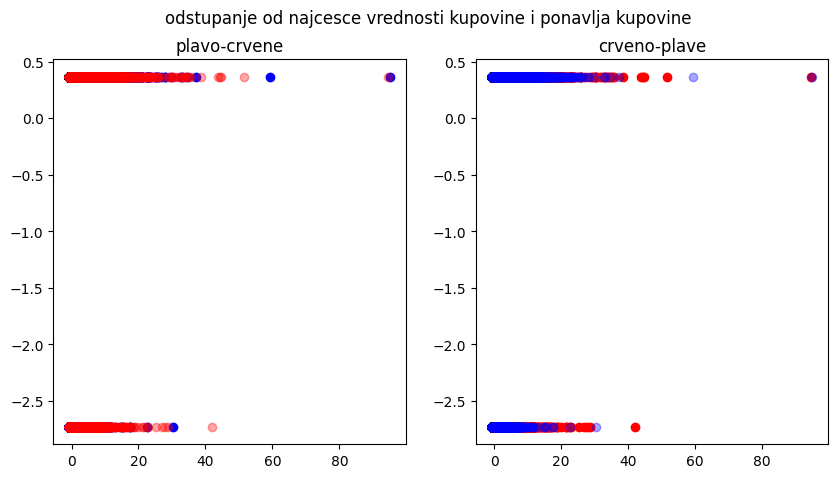

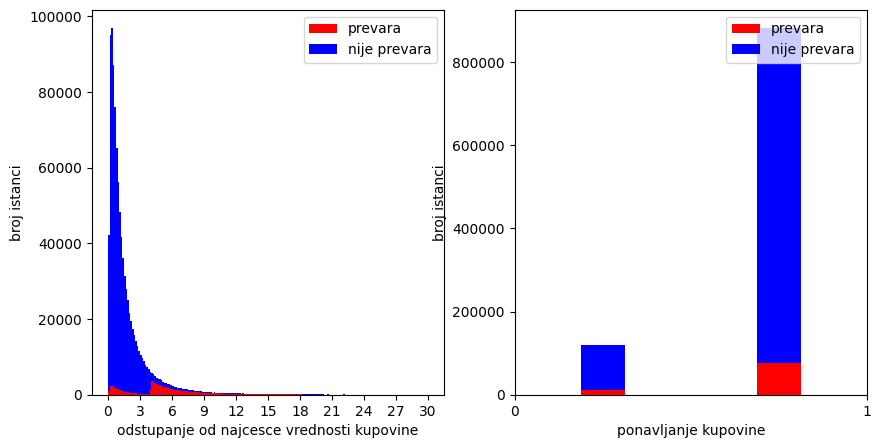

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 2], non_fraud_x[:, 3], c='blue')
axes[0].scatter(fraud_x[:, 2], fraud_x[:, 3], c='red',alpha=.35)
axes[0].set_title('plavo-crvene')

# crveno-plave
axes[1].scatter(fraud_x[:, 2], fraud_x[:, 3], c='red')
axes[1].scatter(non_fraud_x[:, 2], non_fraud_x[:, 3], c='blue',alpha=.35)
axes[1].set_title('crveno-plave')

fig.suptitle('odstupanje od najcesce vrednosti kupovine i ponavlja kupovine')
plt.show()

# histogrami ------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# histogram za odstupanje od najcesce vrednosti kupovine
ax1.hist([x_prevara.iloc[:,2], x_nije_prevara.iloc[:,2]], bins=200, range=(0, 30), color=['red', 'blue'], histtype='barstacked', rwidth=1, label=['prevara', 'nije prevara'])
ax1.set_xlabel('odstupanje od najcesce vrednosti kupovine')
ax1.set_ylabel('broj istanci')
ax1.legend(loc='upper right')
ax1.set_xticks(np.linspace(0, 30, 11))

# histogram za ponavljanje iste kupovine
ax2.hist([x_prevara.iloc[:,3],x_nije_prevara.iloc[:,3]], bins=2, color=['red','blue'], histtype='barstacked', rwidth=0.25, label=['prevara','nije prevara'])
ax2.set_xlabel('ponavljanje kupovine')
ax2.set_ylabel('broj istanci')
ax2.legend(loc='upper right')
ax2.set_xticks([0,1])
ax2.set_xticklabels(['0','1'])

plt.show()

# ***Dodatak za 0-3 (zoom)***

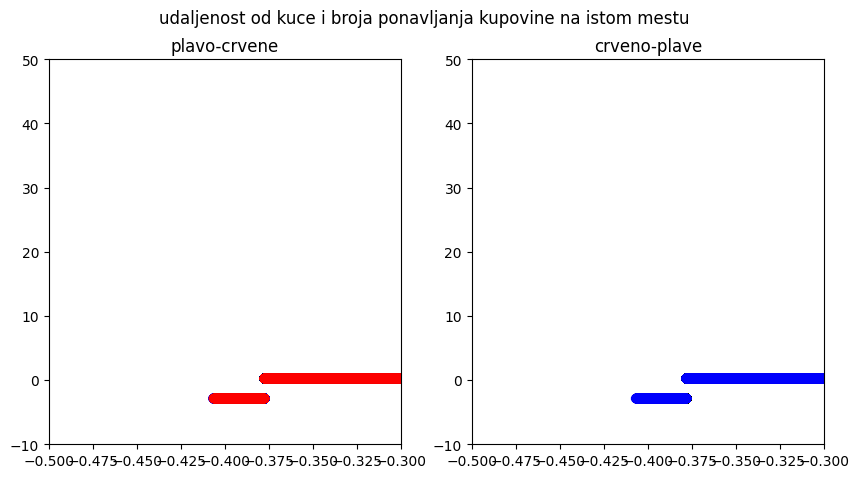

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plavo-crvene
axes[0].scatter(non_fraud_x[:, 0], non_fraud_x[:, 3], c='blue')
axes[0].scatter(fraud_x[:, 0], fraud_x[:, 3], c='red', alpha=.35)
axes[0].set_title('plavo-crvene')
axes[0].set_xlim([-.5, -.3])
axes[0].set_ylim([-10, 50])

# crveno-plave
axes[1].scatter(fraud_x[:, 0], fraud_x[:, 3], c='red')
axes[1].scatter(non_fraud_x[:, 0], non_fraud_x[:, 3], c='blue', alpha=.35)
axes[1].set_title('crveno-plave')
axes[1].set_xlim([-.5, -.3])
axes[1].set_ylim([-10, 50])

fig.suptitle('udaljenost od kuce i broja ponavljanja kupovine na istom mestu')
plt.show()
